# Numerical Simulations and Analysis
Consolidated script with different iterations of the ODE model. We perform numerical simulations to analyze the impact of the June sucker's reintroduction on the Utah Lake ecosystem, both with and without hybridization. 

## Objectives:
* Simulate the June sucker population dynamics over a specified time period.
* Analyze the effects of human intervention, competition, predation, and hybridization on the population.
* Perform sensitivity analyses on key parameters.
* Provide code for replication and further exploration

In [8]:
# Import necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## 1. Model Implementation without Hybridization
First, we implement the ODE model for the June sucker population without considering hybridization. We will simulate scenarios with and without human intervention and analyze the effects of competition and predation.

### Parameters and Initial Conditions
* Intrinsic Growth Rate (r_J): 0.2 per year
* Baseline Carrying Capacity (K_0): 5,000 fish
* Competition Coefficient (alpha): 1e-4 per fish per year
* Predation Coefficient (beta): 5e-5 per fish per year
* Effectiveness of Human Intervention (gamma): 0.5 increase in carrying capacity per unit of H(t)
* Non-native Species Population (N): 1,000 fish
* Predator Population (P): 50 individuals
* Human Intervention Function (H(t)): Variable
* Initial June Sucker Population (J_0): 500 fish

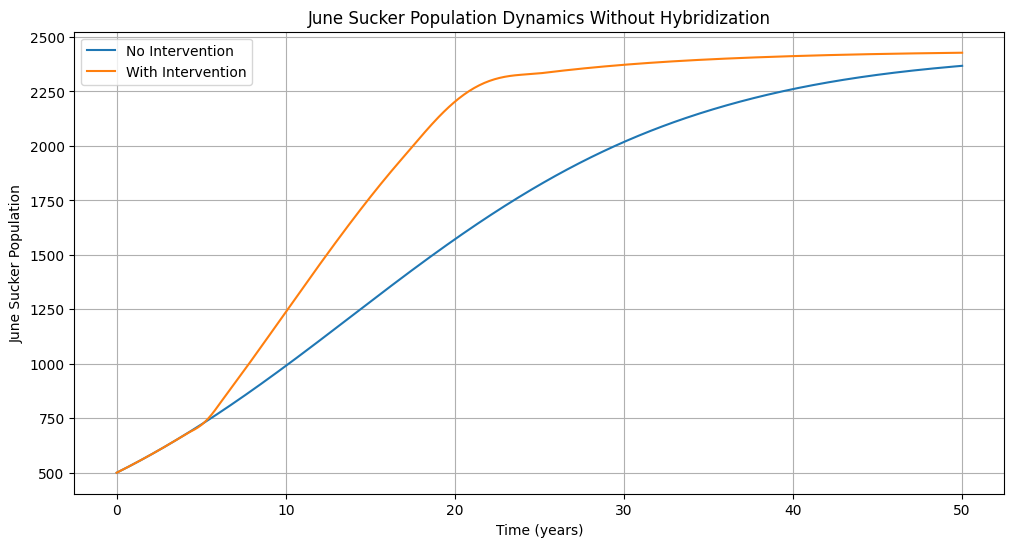

In [9]:
# Define the model parameters
r_J = 0.2            # Intrinsic growth rate of June sucker
K_0 = 5000           # Baseline carrying capacity
alpha = 1e-4         # Competition coefficient
beta = 5e-5          # Predation coefficient
gamma = 0.5          # Effectiveness of human intervention
N = 1000             # Non-native species population
P = 50               # Predator population

# Define the human intervention function H(t)
def H(t):
    # Scenario: Constant stocking and habitat restoration between year 5 and 20
    if 5 <= t <= 20:
        return 50    # Stocking rate of 50 fish per year
    else:
        return 0

# Define the carrying capacity function K(t)
def K(t):
    return K_0 + gamma * H(t)

# Define the ODE system for June sucker population
def june_sucker_model(t, J):
    dJdt = r_J * J * (1 - J / K(t)) - alpha * J * N - beta * J * P + H(t)
    return dJdt

# Set the time span for the simulation
t_span = (0, 50)   # Simulate from year 0 to year 50
t_eval = np.linspace(t_span[0], t_span[1], 500)  # Evaluation times

# Set the initial conditions
J_0 = 500  # Initial June sucker population

# Solve the ODE without human intervention
# First, set H(t) to zero for no intervention
def H_no_intervention(t):
    return 0

# Redefine K(t) for no intervention
def K_no_intervention(t):
    return K_0 + gamma * H_no_intervention(t)

def june_sucker_model_no_intervention(t, J):
    dJdt = r_J * J * (1 - J / K_no_intervention(t)) - alpha * J * N - beta * J * P + H_no_intervention(t)
    return dJdt

sol_no_intervention = solve_ivp(
    june_sucker_model_no_intervention, t_span, [J_0], t_eval=t_eval, method='RK45'
)

# Solve the ODE with human intervention
sol_with_intervention = solve_ivp(
    june_sucker_model, t_span, [J_0], t_eval=t_eval, method='RK45'
)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(sol_no_intervention.t, sol_no_intervention.y[0], label='No Intervention')
plt.plot(sol_with_intervention.t, sol_with_intervention.y[0], label='With Intervention')
plt.title('June Sucker Population Dynamics Without Hybridization')
plt.xlabel('Time (years)')
plt.ylabel('June Sucker Population')
plt.legend()
plt.grid(True)
plt.show()

### Sensitivity Analysis: Varying the Competition Coefficient (alpha)

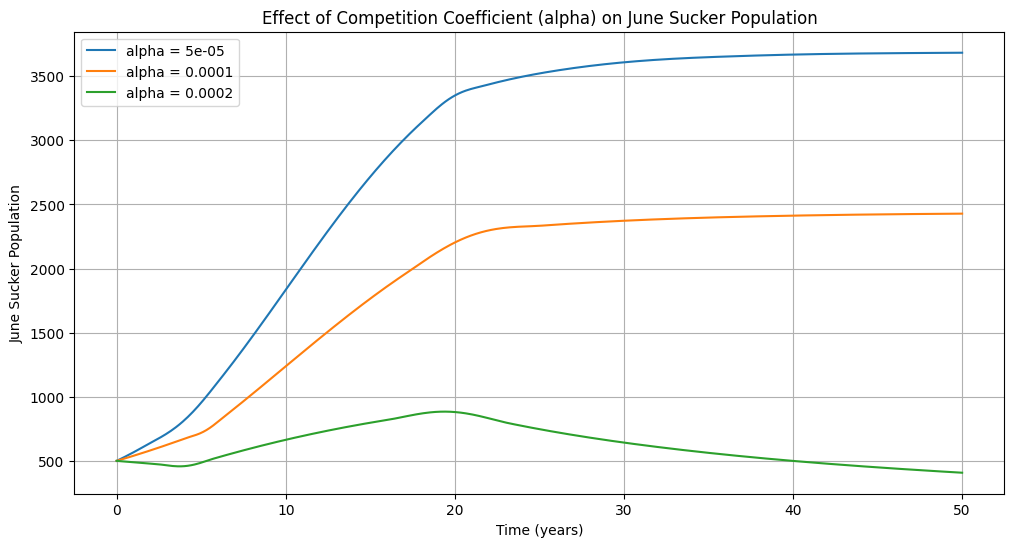

In [10]:
# Test different values of alpha
alpha_values = [5e-5, 1e-4, 2e-4]
plt.figure(figsize=(12, 6))

for alpha in alpha_values:
    # Redefine the ODE model with the new alpha
    def june_sucker_model_alpha(t, J):
        dJdt = r_J * J * (1 - J / K(t)) - alpha * J * N - beta * J * P + H(t)
        return dJdt

    sol = solve_ivp(
        june_sucker_model_alpha, t_span, [J_0], t_eval=t_eval, method='RK45'
    )
    plt.plot(sol.t, sol.y[0], label=f'alpha = {alpha}')

plt.title('Effect of Competition Coefficient (alpha) on June Sucker Population')
plt.xlabel('Time (years)')
plt.ylabel('June Sucker Population')
plt.legend()
plt.grid(True)
plt.show()

### Sensitivity Analysis: Varying the Predation Coefficient (beta)

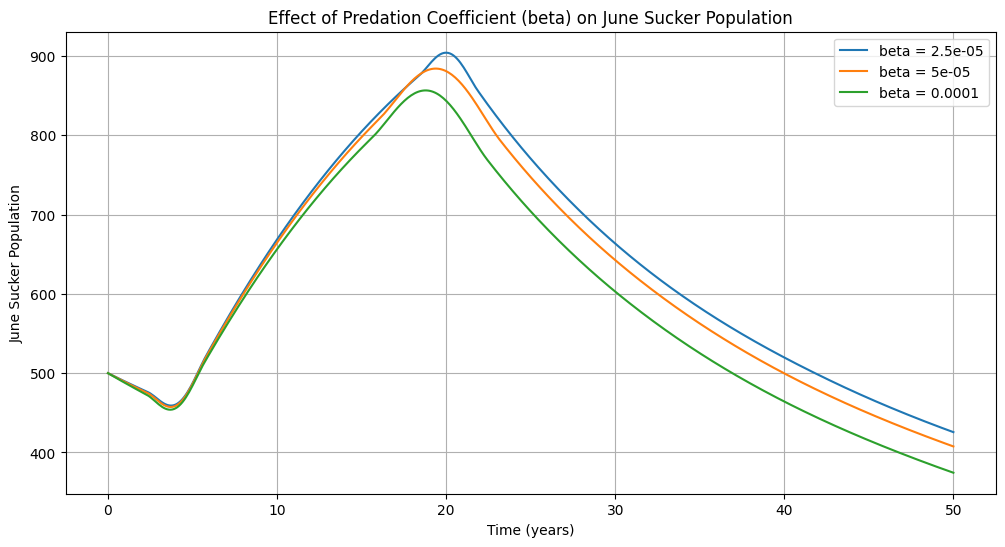

In [11]:
# Test different values of beta
beta_values = [2.5e-5, 5e-5, 1e-4]
plt.figure(figsize=(12, 6))

for beta in beta_values:
    # Redefine the ODE model with the new beta
    def june_sucker_model_beta(t, J):
        dJdt = r_J * J * (1 - J / K(t)) - alpha * J * N - beta * J * P + H(t)
        return dJdt

    sol = solve_ivp(
        june_sucker_model_beta, t_span, [J_0], t_eval=t_eval, method='RK45'
    )
    plt.plot(sol.t, sol.y[0], label=f'beta = {beta}')

plt.title('Effect of Predation Coefficient (beta) on June Sucker Population')
plt.xlabel('Time (years)')
plt.ylabel('June Sucker Population')
plt.legend()
plt.grid(True)
plt.show()

## 2. Model Implementation with Dynamic N(t) and P(t)
Next, we extend the model to include dynamic populations of non-native species (N) and predators (P). This allows us to analyze the interactions between these species and the June sucker over time.

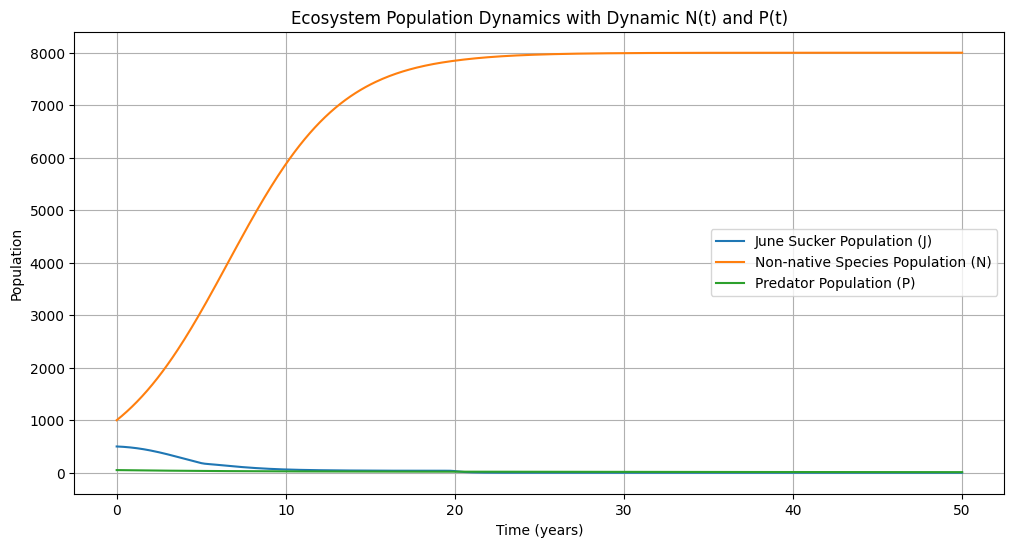

In [12]:
# Define additional model parameters
# Non-native species parameters
r_N = 0.3            # Intrinsic growth rate of non-native species
K_N = 8000           # Carrying capacity for non-native species
delta = 1e-5         # Competition coefficient (impact of J on N)

# Predator parameters
s = 1e-5             # Predation success rate
m = 0.1              # Mortality rate of predators

# Redefine the ODE system including N(t) and P(t)
def ecosystem_model(t, y):
    J, N, P = y  # Unpack the variables
    # June sucker population dynamics
    dJdt = r_J * J * (1 - J / K(t)) - alpha * J * N - beta * J * P + H(t)
    # Non-native species population dynamics
    dNdt = r_N * N * (1 - N / K_N) - delta * N * J
    # Predator population dynamics
    dPdt = s * (J + N) * P - m * P
    return [dJdt, dNdt, dPdt]

# Set initial conditions for N and P
N_0 = 1000  # Initial non-native species population
P_0 = 50    # Initial predator population

# Solve the ODE system
sol = solve_ivp(
    ecosystem_model, t_span, [J_0, N_0, P_0], t_eval=t_eval, method='RK45'
)

# Extract solutions
J_t = sol.y[0]
N_t = sol.y[1]
P_t = sol.y[2]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(sol.t, J_t, label='June Sucker Population (J)')
plt.plot(sol.t, N_t, label='Non-native Species Population (N)')
plt.plot(sol.t, P_t, label='Predator Population (P)')
plt.title('Ecosystem Population Dynamics with Dynamic N(t) and P(t)')
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

### Sensitivity Analysis: Varying Competition Coefficients (alpha and delta)

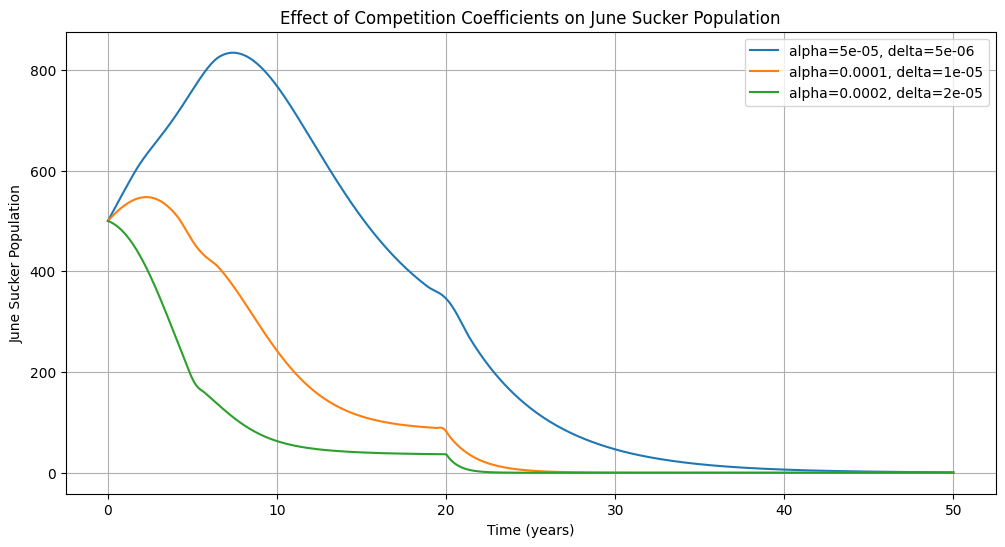

In [13]:
# Test different values of alpha and delta
alpha_values = [5e-5, 1e-4, 2e-4]
delta_values = [5e-6, 1e-5, 2e-5]

plt.figure(figsize=(12, 6))

for alpha, delta in zip(alpha_values, delta_values):
    def ecosystem_model_competition(t, y):
        J, N, P = y
        dJdt = r_J * J * (1 - J / K(t)) - alpha * J * N - beta * J * P + H(t)
        dNdt = r_N * N * (1 - N / K_N) - delta * N * J
        dPdt = s * (J + N) * P - m * P
        return [dJdt, dNdt, dPdt]

    sol = solve_ivp(
        ecosystem_model_competition, t_span, [J_0, N_0, P_0], t_eval=t_eval, method='RK45'
    )

    plt.plot(sol.t, sol.y[0], label=f'alpha={alpha}, delta={delta}')

plt.title('Effect of Competition Coefficients on June Sucker Population')
plt.xlabel('Time (years)')
plt.ylabel('June Sucker Population')
plt.legend()
plt.grid(True)
plt.show()

### Sensitivity Analysis: Varying Predation Success Rate (s)

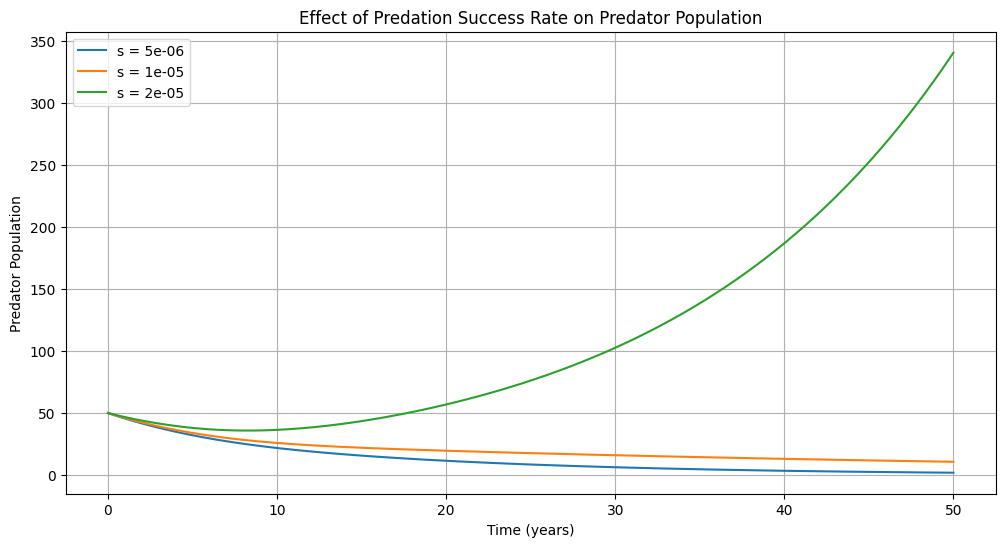

In [14]:
# Test different values of s
s_values = [5e-6, 1e-5, 2e-5]

plt.figure(figsize=(12, 6))

for s in s_values:
    def ecosystem_model_predation(t, y):
        J, N, P = y
        dJdt = r_J * J * (1 - J / K(t)) - alpha * J * N - beta * J * P + H(t)
        dNdt = r_N * N * (1 - N / K_N) - delta * N * J
        dPdt = s * (J + N) * P - m * P
        return [dJdt, dNdt, dPdt]

    sol = solve_ivp(
        ecosystem_model_predation, t_span, [J_0, N_0, P_0], t_eval=t_eval, method='RK45'
    )

    plt.plot(sol.t, sol.y[2], label=f's = {s}')

plt.title('Effect of Predation Success Rate on Predator Population')
plt.xlabel('Time (years)')
plt.ylabel('Predator Population')
plt.legend()
plt.grid(True)
plt.show()

## 3. Model Implementation with Hybridization
Finally, we incorporate hybridization into the model, adding a hybrid population (H) and updating the equations accordingly. We also perform sensitivity analyses on the hybridization coefficient (s_H) and the growth rate of hybrids (r_H).


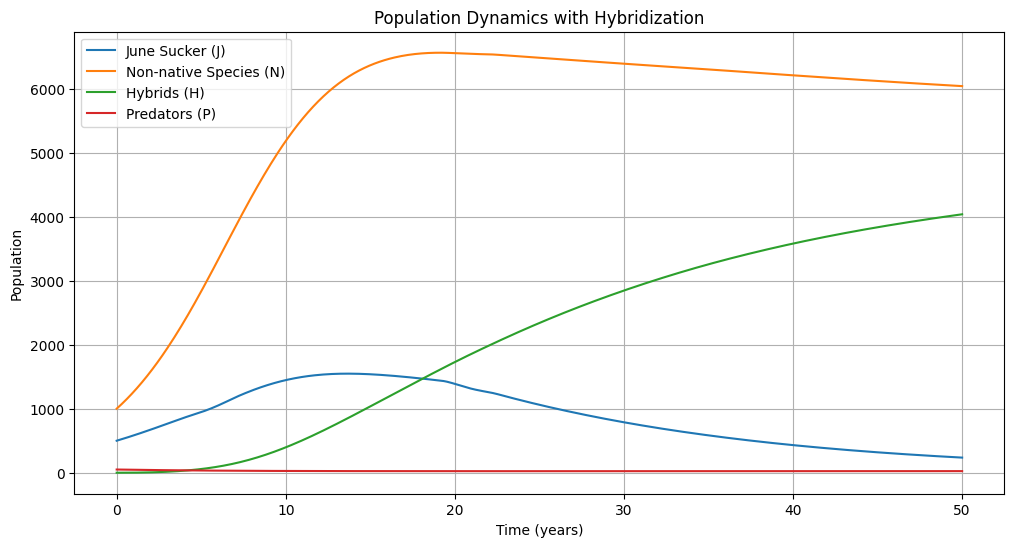

In [15]:
# Updated model parameters including hybrids
r_J = 0.2
r_N = 0.3
r_H = 0.25
K_0 = 10000
c_JN = c_NJ = 1.0
c_JH = c_NH = c_HJ = c_HN = 0.9
beta_J = beta_N = beta_H = 5e-5
s_H = 1e-5
s_P = 1e-5
m_P = 0.1
gamma = 0.5

# Human intervention functions (updated)
def H_J(t):
    return 50 if 5 <= t <= 20 else 0

def H_N(t):
    return -10

def H_H(t):
    return -5

# Carrying capacity function (updated)
def K(t):
    return K_0 + gamma * H_J(t)

# ODE system including hybrids
def ecosystem_model_hybrid(t, y):
    J, N, H, P = y
    dJdt = (
        r_J * J * (1 - (J + c_JN * N + c_JH * H) / K(t))
        - beta_J * J * P
        - s_H * J * N
        + H_J(t)
    )
    dNdt = (
        r_N * N * (1 - (N + c_NJ * J + c_NH * H) / K(t))
        - beta_N * N * P
        - s_H * J * N
        + H_N(t)
    )
    dHdt = (
        s_H * J * N
        + r_H * H * (1 - (H + c_HJ * J + c_HN * N) / K(t))
        - beta_H * H * P
        + H_H(t)
    )
    dPdt = s_P * (J + N + H) * P - m_P * P
    return [dJdt, dNdt, dHdt, dPdt]

# Time span and initial conditions
t_span = (0, 50)
t_eval = np.linspace(*t_span, 500)
initial_conditions = [500, 1000, 0, 50]  # J_0, N_0, H_0, P_0

# Solving the ODE system
solution = solve_ivp(ecosystem_model_hybrid, t_span, initial_conditions, t_eval=t_eval)

# Extracting results
J_t, N_t, H_t, P_t = solution.y

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(solution.t, J_t, label='June Sucker (J)')
plt.plot(solution.t, N_t, label='Non-native Species (N)')
plt.plot(solution.t, H_t, label='Hybrids (H)')
plt.plot(solution.t, P_t, label='Predators (P)')
plt.title('Population Dynamics with Hybridization')
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

### Checking if Predator Population Ever Reaches Zero

The predator population never reaches zero during the simulation.


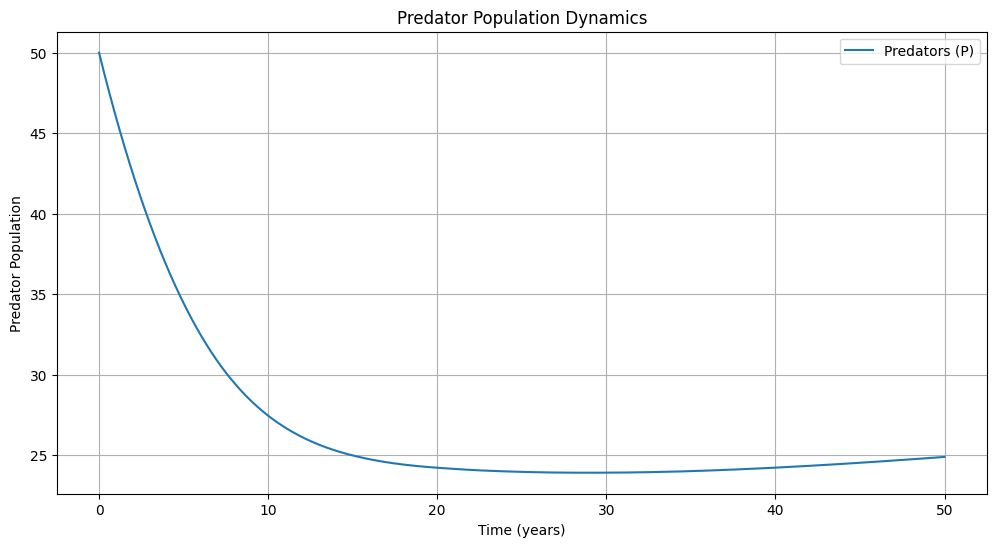

In [16]:
# Define a small threshold for extinction
threshold = 1e-6

# Find indices where predator population is zero or near zero
extinction_indices = np.where(P_t <= threshold)[0]

if extinction_indices.size > 0:
    # Get the corresponding times
    extinction_times = solution.t[extinction_indices]
    print(f"The predator population reaches zero or near zero at times: {extinction_times}")
else:
    print("The predator population never reaches zero during the simulation.")

# Plot the predator population
plt.figure(figsize=(12, 6))
plt.plot(solution.t, P_t, label='Predators (P)')
plt.title('Predator Population Dynamics')
plt.xlabel('Time (years)')
plt.ylabel('Predator Population')
plt.legend()
plt.grid(True)
plt.show()

### Sensitivity Analysis: Impact of Hybridization Coefficient (s_H)

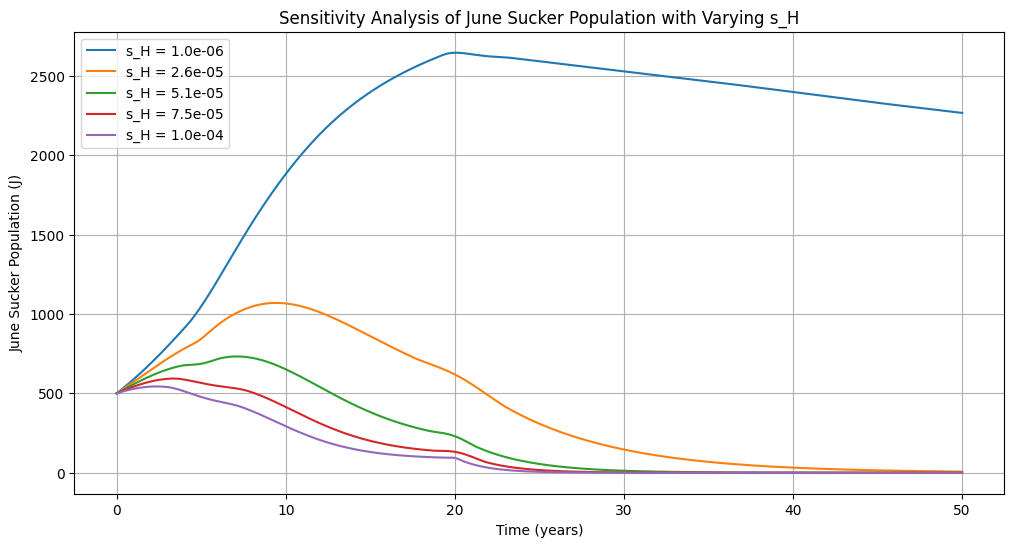

In [17]:
# ODE system modified to accept s_H as a parameter
def ecosystem_model_sH(t, y, s_H):
    J, N, H, P = y
    dJdt = (
        r_J * J * (1 - (J + c_JN * N + c_JH * H) / K(t))
        - beta_J * J * P
        - s_H * J * N
        + H_J(t)
    )
    dNdt = (
        r_N * N * (1 - (N + c_NJ * J + c_NH * H) / K(t))
        - beta_N * N * P
        - s_H * J * N
        + H_N(t)
    )
    dHdt = (
        s_H * J * N
        + r_H * H * (1 - (H + c_HJ * J + c_HN * N) / K(t))
        - beta_H * H * P
        + H_H(t)
    )
    dPdt = s_P * (J + N + H) * P - m_P * P
    return [dJdt, dNdt, dHdt, dPdt]

# Range of s_H values for sensitivity analysis
s_H_values = np.linspace(1e-6, 1e-4, 5)  

# Prepare to store results
results = []

# Perform simulations for each s_H value
for s_H in s_H_values:
    # Solving the ODE system with the current s_H
    solution = solve_ivp(
        lambda t, y: ecosystem_model_sH(t, y, s_H),
        t_span,
        initial_conditions,
        t_eval=t_eval
    )
    # Store the time and June sucker population
    results.append({
        's_H': s_H,
        'time': solution.t,
        'J_t': solution.y[0]
    })

# Plotting the results
plt.figure(figsize=(12, 6))

for res in results:
    plt.plot(
        res['time'],
        res['J_t'],
        label=f's_H = {res["s_H"]:.1e}'
    )

plt.title('Sensitivity Analysis of June Sucker Population with Varying s_H')
plt.xlabel('Time (years)')
plt.ylabel('June Sucker Population (J)')
plt.legend()
plt.grid(True)
plt.show()

### Sensitivity Analysis: Impact of Growth Rate of Hybrids (r_H)

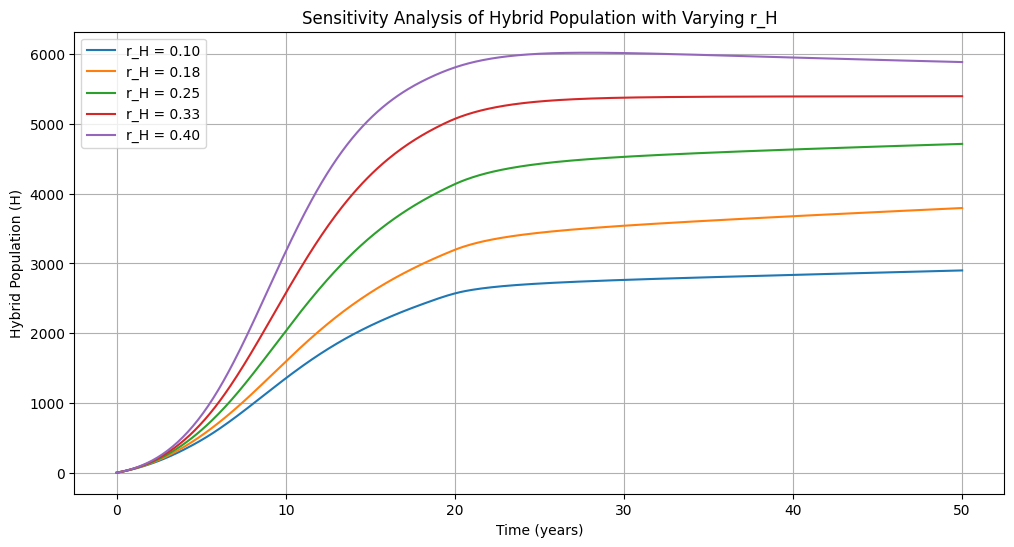

r_H = 0.10, Maximum Hybrid Population: 2899.89
r_H = 0.18, Maximum Hybrid Population: 3794.32
r_H = 0.25, Maximum Hybrid Population: 4713.88
r_H = 0.33, Maximum Hybrid Population: 5397.52
r_H = 0.40, Maximum Hybrid Population: 6020.80


In [19]:
# ODE system modified to accept r_H as a parameter
def ecosystem_model_rH(t, y, r_H):
    J, N, H, P = y
    dJdt = (
        r_J * J * (1 - (J + c_JN * N + c_JH * H) / K(t))
        - beta_J * J * P
        - s_H * J * N
        + H_J(t)
    )
    dNdt = (
        r_N * N * (1 - (N + c_NJ * J + c_NH * H) / K(t))
        - beta_N * N * P
        - s_H * J * N
        + H_N(t)
    )
    dHdt = (
        s_H * J * N
        + r_H * H * (1 - (H + c_HJ * J + c_HN * N) / K(t))
        - beta_H * H * P
        + H_H(t)
    )
    dPdt = s_P * (J + N + H) * P - m_P * P
    return [dJdt, dNdt, dHdt, dPdt]

# Range of r_H values for sensitivity analysis
r_H_values = np.linspace(0.1, 0.4, 5)  

# Prepare to store results
results = []

# Perform simulations for each r_H value
for r_H in r_H_values:
    # Solving the ODE system with the current r_H
    solution = solve_ivp(
        lambda t, y: ecosystem_model_rH(t, y, r_H),
        t_span,
        initial_conditions,
        t_eval=t_eval
    )
    # Store the time and hybrid population
    results.append({
        'r_H': r_H,
        'time': solution.t,
        'H_t': solution.y[2]
    })

# Plotting the results
plt.figure(figsize=(12, 6))

for res in results:
    plt.plot(
        res['time'],
        res['H_t'],
        label=f'r_H = {res["r_H"]:.2f}'
    )

plt.title('Sensitivity Analysis of Hybrid Population with Varying r_H')
plt.xlabel('Time (years)')
plt.ylabel('Hybrid Population (H)')
plt.legend()
plt.grid(True)
plt.show()

# Maximum hybrid population
for res in results:
    max_H = np.max(res['H_t'])
    print(f"r_H = {res['r_H']:.2f}, Maximum Hybrid Population: {max_H:.2f}")